# Introducing Keras 

[`keras`](https://keras.io/) is a library designed to simplify the access to deep learning functionality of TensorFlow (and Theano, but we will not touch on that at all).

We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from utils import generate_dataset

Numpy and Matplotlib are always good to have...

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We'll also set up some configuration variables up-front:

In [3]:
# Configuration variables:
num_labels = 2    # The number of labels.
NUM_EPOCHS = 5
NUM_HIDDEN = 5
BATCH_SIZE = 100  # The number of training examples to use per training step.
n_train = 1000
n_test = 200

### The first example is a linearly separable data-set:

In [4]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, n_train=1000, n_test=200, num_labels=2,
                                                                    centers=2, center_box=[-4., 4.])

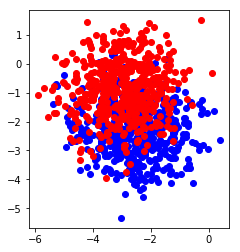

In [5]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [6]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [7]:
train_labels

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0,

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
model.fit(train_data, train_labels, epochs=10, batch_size=BATCH_SIZE)

Epoch 1/10
1000/1000 [==============================] - 0s 277us/step - loss: 0.2977 - acc: 0.5250
Epoch 2/10
1000/1000 [==============================] - 0s 28us/step - loss: 0.2898 - acc: 0.5290
Epoch 3/10
1000/1000 [==============================] - 0s 25us/step - loss: 0.2837 - acc: 0.5330
Epoch 4/10
1000/1000 [==============================] - 0s 36us/step - loss: 0.2780 - acc: 0.5360
Epoch 5/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.2726 - acc: 0.5400
Epoch 6/10
1000/1000 [==============================] - 0s 17us/step - loss: 0.2673 - acc: 0.5470
Epoch 7/10
1000/1000 [==============================] - 0s 30us/step - loss: 0.2622 - acc: 0.5510
Epoch 8/10
1000/1000 [==============================] - 0s 35us/step - loss: 0.2574 - acc: 0.5580
Epoch 9/10
1000/1000 [==============================] - 0s 47us/step - loss: 0.2528 - acc: 0.5610
Epoch 10/10
1000/1000 [==============================] - 0s 17us/step - loss: 0.2484 - acc: 0.5670


In [11]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)

200/200 [==============================] - 0s 104us/step


In [12]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.26505536586
acc : 0.539999991655


In [13]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls_np = np.zeros((cls_idx.shape[0], 2))
cls_np[np.arange(cls_np.shape[0]), cls_idx] = 1

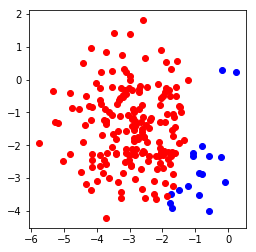

In [14]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls_np[:, 0]), 0], test_data[np.where(cls_np[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls_np[:, 1]), 0], test_data[np.where(cls_np[:, 1]), 1], 'ro')
ax.set_aspect('equal')

### The next set of data is not linearly separable:

In [15]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_moons, 
                                                                    n_train=1000, 
                                                                    n_test=200,
                                                                    num_labels=2, 
                                                                    noise=0.2)

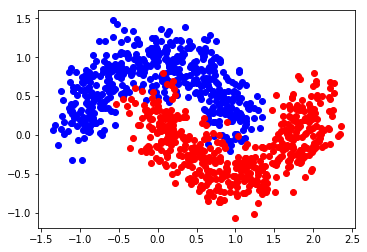

In [16]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [17]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [18]:
model.fit(train_data, train_labels, nb_epoch=10, batch_size=BATCH_SIZE)

Epoch 1/10
1000/1000 [==============================] - 0s 21us/step - loss: 0.3437 - acc: 0.2540
Epoch 2/10
1000/1000 [==============================] - 0s 16us/step - loss: 0.3403 - acc: 0.2560
Epoch 3/10
1000/1000 [==============================] - 0s 20us/step - loss: 0.3371 - acc: 0.2530
Epoch 4/10
1000/1000 [==============================] - 0s 23us/step - loss: 0.3338 - acc: 0.2540
Epoch 5/10
1000/1000 [==============================] - 0s 25us/step - loss: 0.3306 - acc: 0.2580
Epoch 6/10
1000/1000 [==============================] - 0s 16us/step - loss: 0.3275 - acc: 0.2590
Epoch 7/10
1000/1000 [==============================] - 0s 15us/step - loss: 0.3243 - acc: 0.2590
Epoch 8/10
1000/1000 [==============================] - 0s 20us/step - loss: 0.3212 - acc: 0.2610
Epoch 9/10
 100/1000 [==>...........................] - ETA: 0s - loss: 0.3062 - acc: 0.3100

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


1000/1000 [==============================] - 0s 20us/step - loss: 0.3182 - acc: 0.2590
Epoch 10/10
1000/1000 [==============================] - 0s 14us/step - loss: 0.3153 - acc: 0.2600


In [19]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 26us/step

loss : 0.315147995949
acc : 0.240000002086


In [20]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

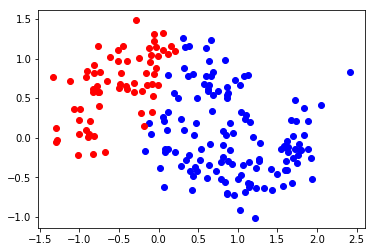

In [21]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [22]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, 
                                                                    n_train=1000,
                                                                    n_test=200, 
                                                                    noise=0.2, 
                                                                    num_labels=2,
                                                                    factor=0.1)

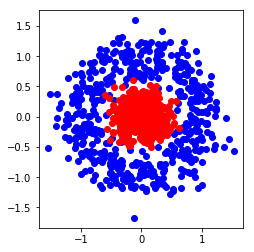

In [23]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [24]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [25]:
model.fit(train_data, train_labels, nb_epoch=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1000/1000 [==============================] - 0s 24us/step - loss: 0.2533 - acc: 0.3780
Epoch 2/5
1000/1000 [==============================] - 0s 14us/step - loss: 0.2533 - acc: 0.3880
Epoch 3/5
1000/1000 [==============================] - 0s 13us/step - loss: 0.2532 - acc: 0.3880
Epoch 4/5
1000/1000 [==============================] - 0s 14us/step - loss: 0.2531 - acc: 0.3910
Epoch 5/5
1000/1000 [==============================] - 0s 14us/step - loss: 0.2529 - acc: 0.3920


/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [26]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 38us/step

loss : 0.253925025463
acc : 0.350000008941


In [27]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

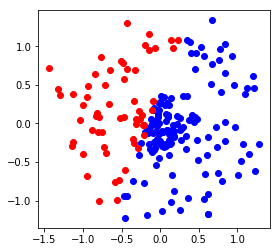

In [28]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [29]:
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.fit(train_data, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Epoch 1/5
1000/1000 [==============================] - 0s 443us/step - loss: 0.6457 - acc: 0.5570
Epoch 2/5
1000/1000 [==============================] - 0s 23us/step - loss: 0.6029 - acc: 0.6240
Epoch 3/5
1000/1000 [==============================] - 0s 20us/step - loss: 0.5613 - acc: 0.7100
Epoch 4/5
1000/1000 [==============================] - 0s 22us/step - loss: 0.5264 - acc: 0.7970
Epoch 5/5
1000/1000 [==============================] - 0s 22us/step - loss: 0.4932 - acc: 0.8270

200/200 [==============================] - 0s 142us/step

loss : 0.451795265079
acc : 0.884999990463


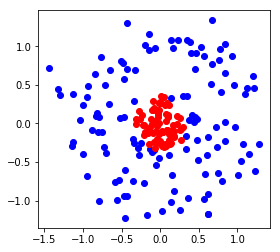

In [31]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [32]:
import keras 

In [33]:
keras.__version__

'2.1.2'